In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive/')
os.getcwd()

'/content/gdrive/My Drive'

In [0]:
import PIL
from PIL import Image
import cv2

In [3]:
import keras
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import requests
from skimage.segmentation import slic
import matplotlib.pylab as pl
import numpy as np

Using TensorFlow backend.


In [4]:
#0 사용할 패키지 불러오기
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

print('Desktop running: keras', keras.__version__)
np.random.seed(222)

Desktop running: keras 2.2.5


In [5]:
# load model data
r = requests.get('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json')
feature_names = r.json()
model = VGG16()





553467904/553467096 [==============================] - 33s 0us/step








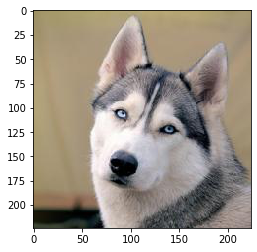

In [8]:
img = PIL.Image.open("/content/gdrive/My Drive/LIME_image/husky.jpg")
Xi = img.resize((224, 224))
plt.imshow(Xi)
plt.show()

In [0]:
np.random.seed(42)
img_array = np.array(Xi)
img_array = img_array[np.newaxis,:]
img_array = img_array.astype(np.float)

In [12]:
preds = model.predict(img_array)
decode_predictions(preds)[0]

40960/35363 [==================================] - 0s 0us/step


[('n02109961', 'Eskimo_dog', 0.5795783),
 ('n02110185', 'Siberian_husky', 0.41969636),
 ('n02110063', 'malamute', 0.00061440805),
 ('n02115641', 'dingo', 2.954696e-05),
 ('n02114367', 'timber_wolf', 2.334069e-05)]

In [0]:
top_pred_classes = preds[0].argsort()[-3:][::-1]

In [14]:
superpixels = skimage.segmentation.slic(Xi, compactness=30, n_segments=100)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

98

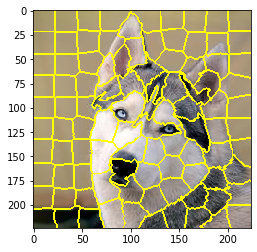

In [15]:
plt.imshow(skimage.segmentation.mark_boundaries(Xi, superpixels))
plt.show()

In [16]:
num_perturb = 200
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [0]:
def perturb_image(img, perturbation, segments):
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1
    perturbed_image = copy.deepcopy(img)
    perturbed_image =mask[:,:, np.newaxis] * perturbed_image 
    return perturbed_image

In [0]:
actve_pixels = np.where(perturbations[0] ==1)[0]
mask = np.zeros(superpixels.shape)
for active in active_pixels:
  mask[superpixels == active] = 1
perturbed_image = copy.deepcopy(Xi)

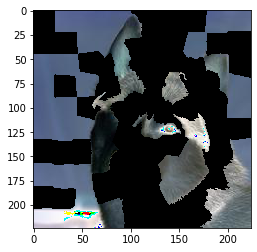

In [58]:
plt.imshow((mask[:,:, np.newaxis] * 255).astype(np.uint8)*perturbed_image)

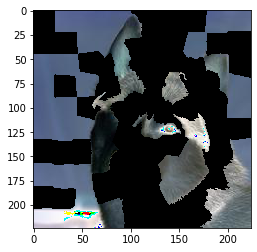

In [31]:
plt.imshow((perturb_image(Xi, perturbations[0], superpixels) * 255).astype(np.uint8))